In [2]:
%load_ext autoreload
%autoreload 2
import os
import pickle as pkl
from os.path import join as oj

import dvu
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import ceil
from tqdm import tqdm
import traceback
import numpy as np
import matplotlib.patches as patches
import sys
sys.path.append('../..')

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')
from config.saps.datasets import DATASETS_CLASSIFICATION, DATASETS_REGRESSION
from util import DATASET_PATH
from viz import *
from viz_shrinkage import make_comparison_grid
import viz
RESULTS_PATH = oj(os.path.dirname(DATASET_PATH), 'results')

print('num_datasets', len(DATASETS_CLASSIFICATION), len(DATASETS_REGRESSION))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

num_datasets 11 9


In [3]:
# run comparison aggregations
!python3 "../../02_aggregate_comparisons.py"

	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/credit/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/ionosphere/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/german-credit/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/juvenile/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/satellite-image/train-test
../../02_aggregate_comparisons.py:50: UserWarning: bad complexity range
  warnings.warn(f'bad complexity range')
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/echo-months/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/abalone/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/heart/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/breast-tumor/train-test
	processing path 

# overarching plots


100%|██████████| 9/9 [00:05<00:00,  1.74it/s]


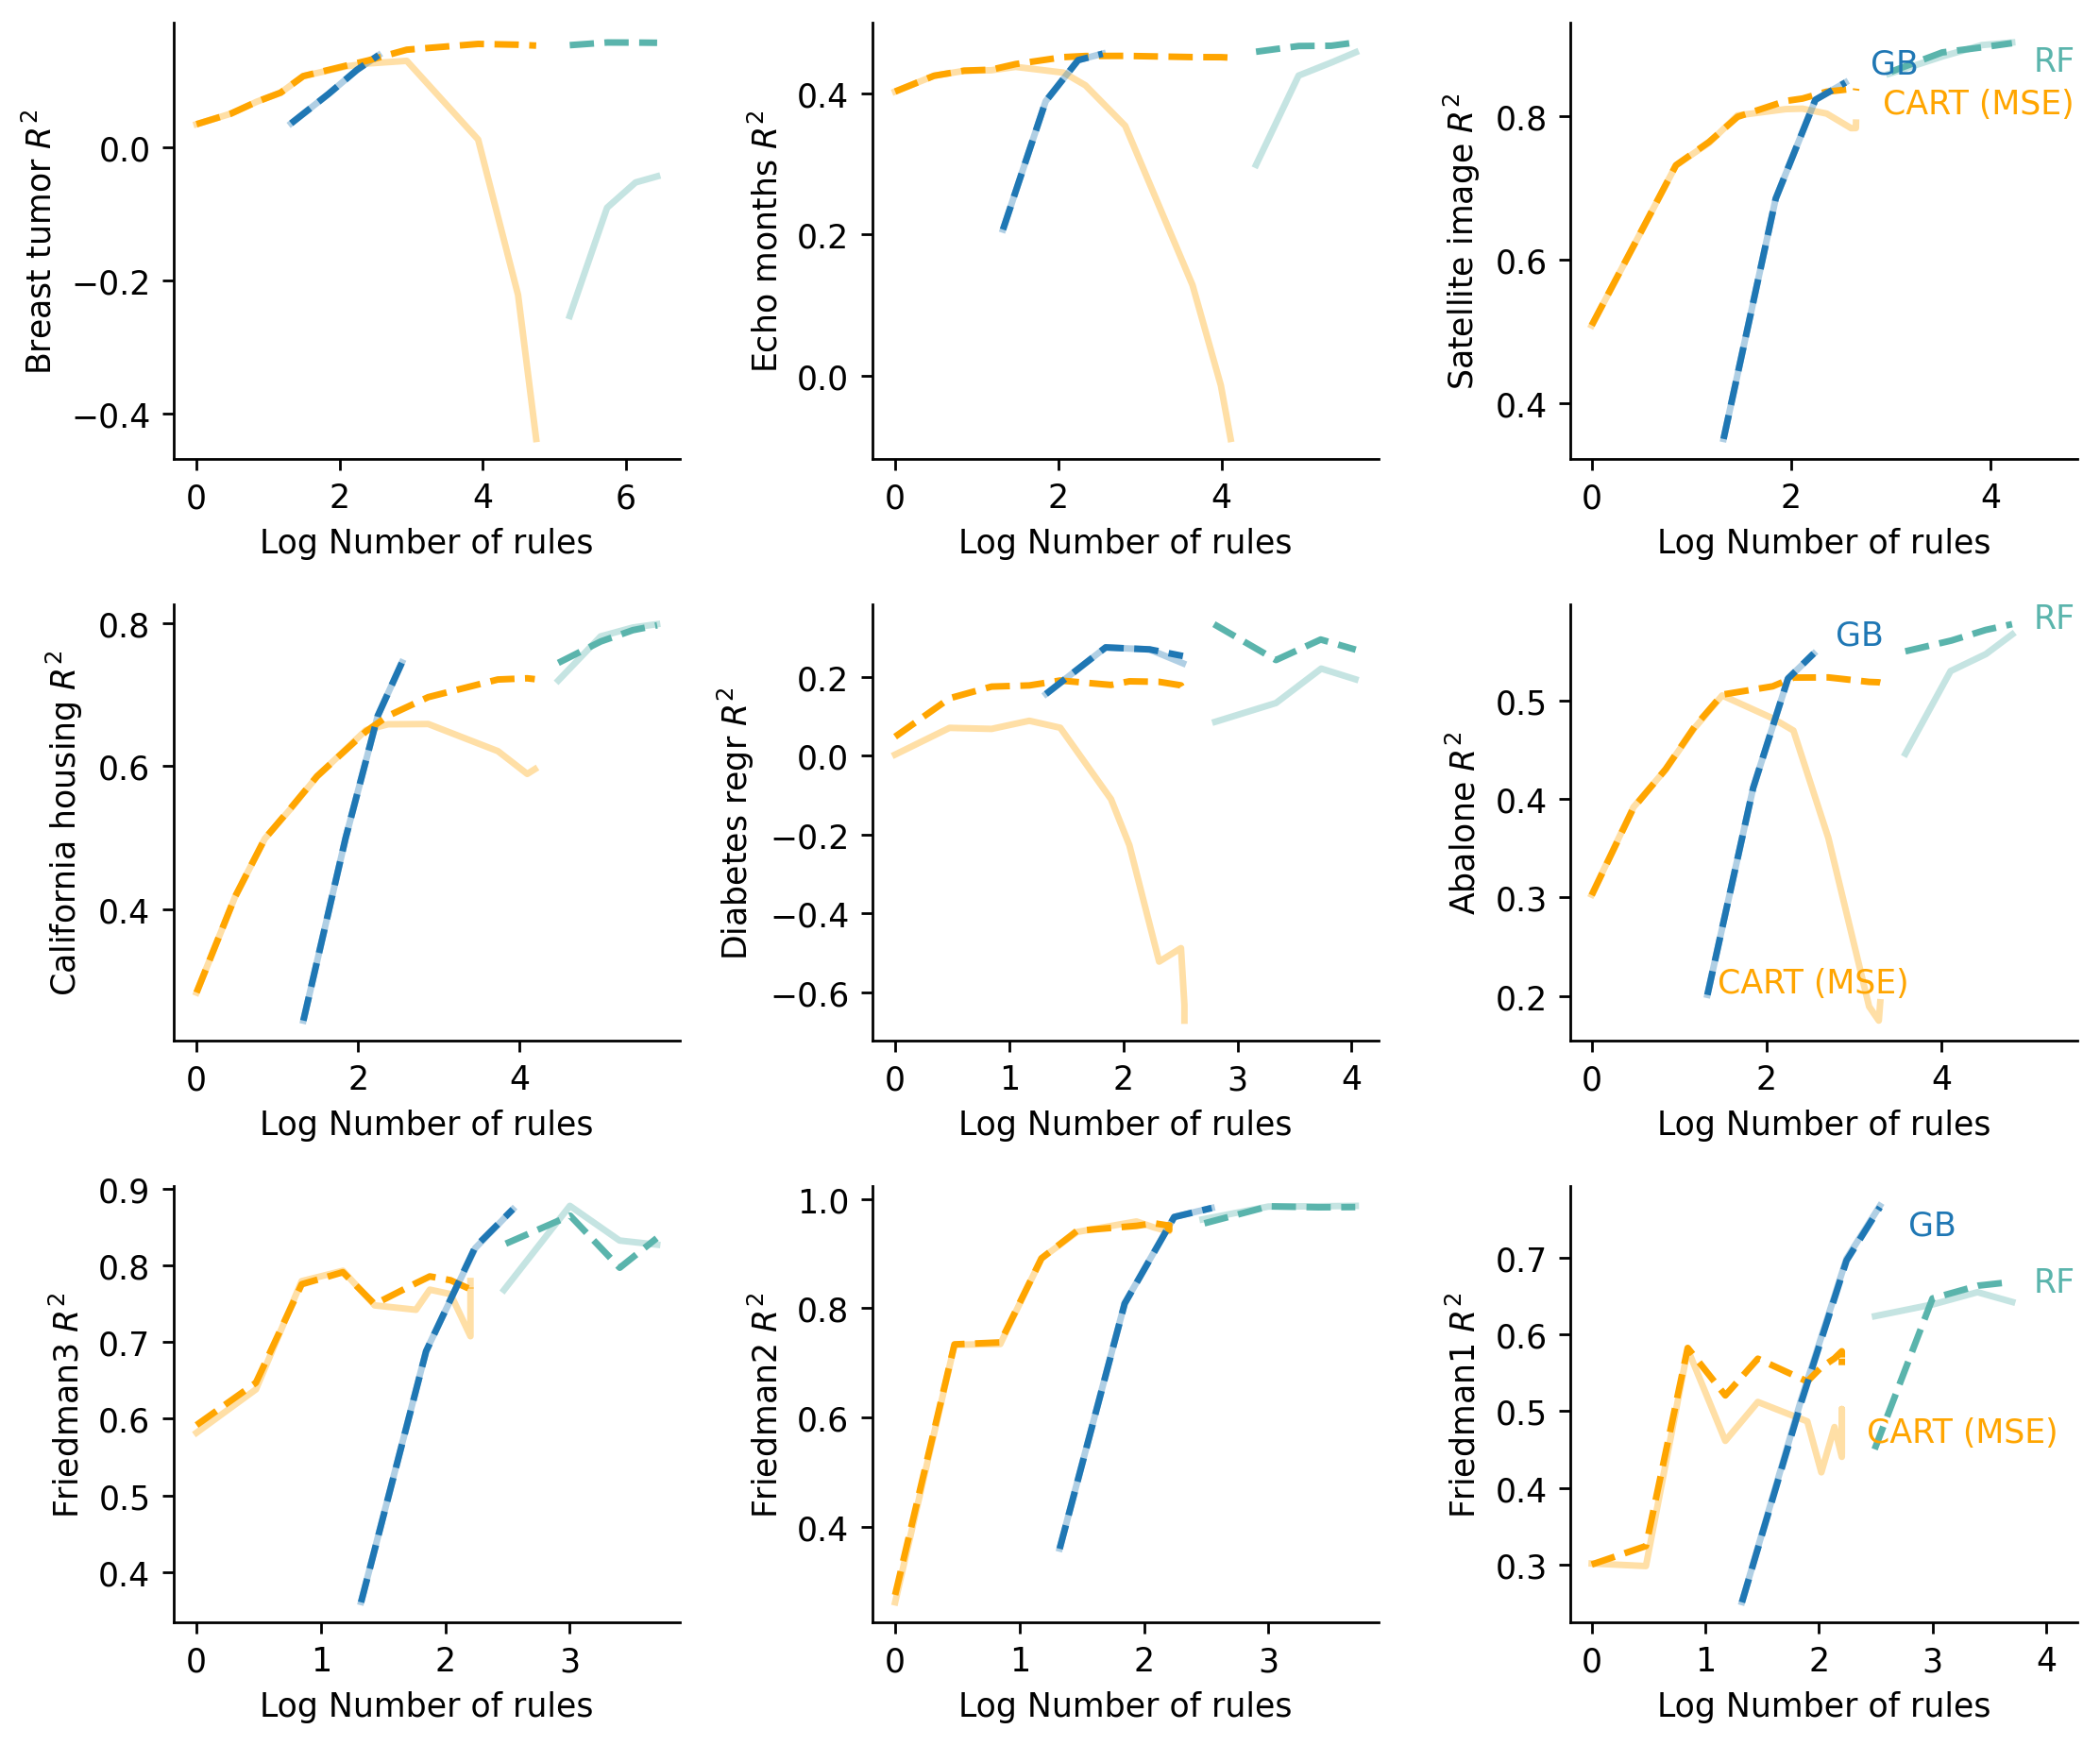

In [4]:
make_comparison_grid(metric='r2', num_dsets=len(DATASETS_REGRESSION), datasets=DATASETS_REGRESSION, # len(DATASETS_REGRESSION)
                models_to_include=['ShrunkCART', 'CART_(MSE)',
                                   'Shrunk_Random_Forest', 'Random_Forest',
                                   'Shrunk_Gradient_Boosting', 'Gradient_Boosting'],
                save_name='shrinkage-regression-reg', data_type='reg_data')

100%|██████████| 9/9 [00:02<00:00,  3.14it/s]


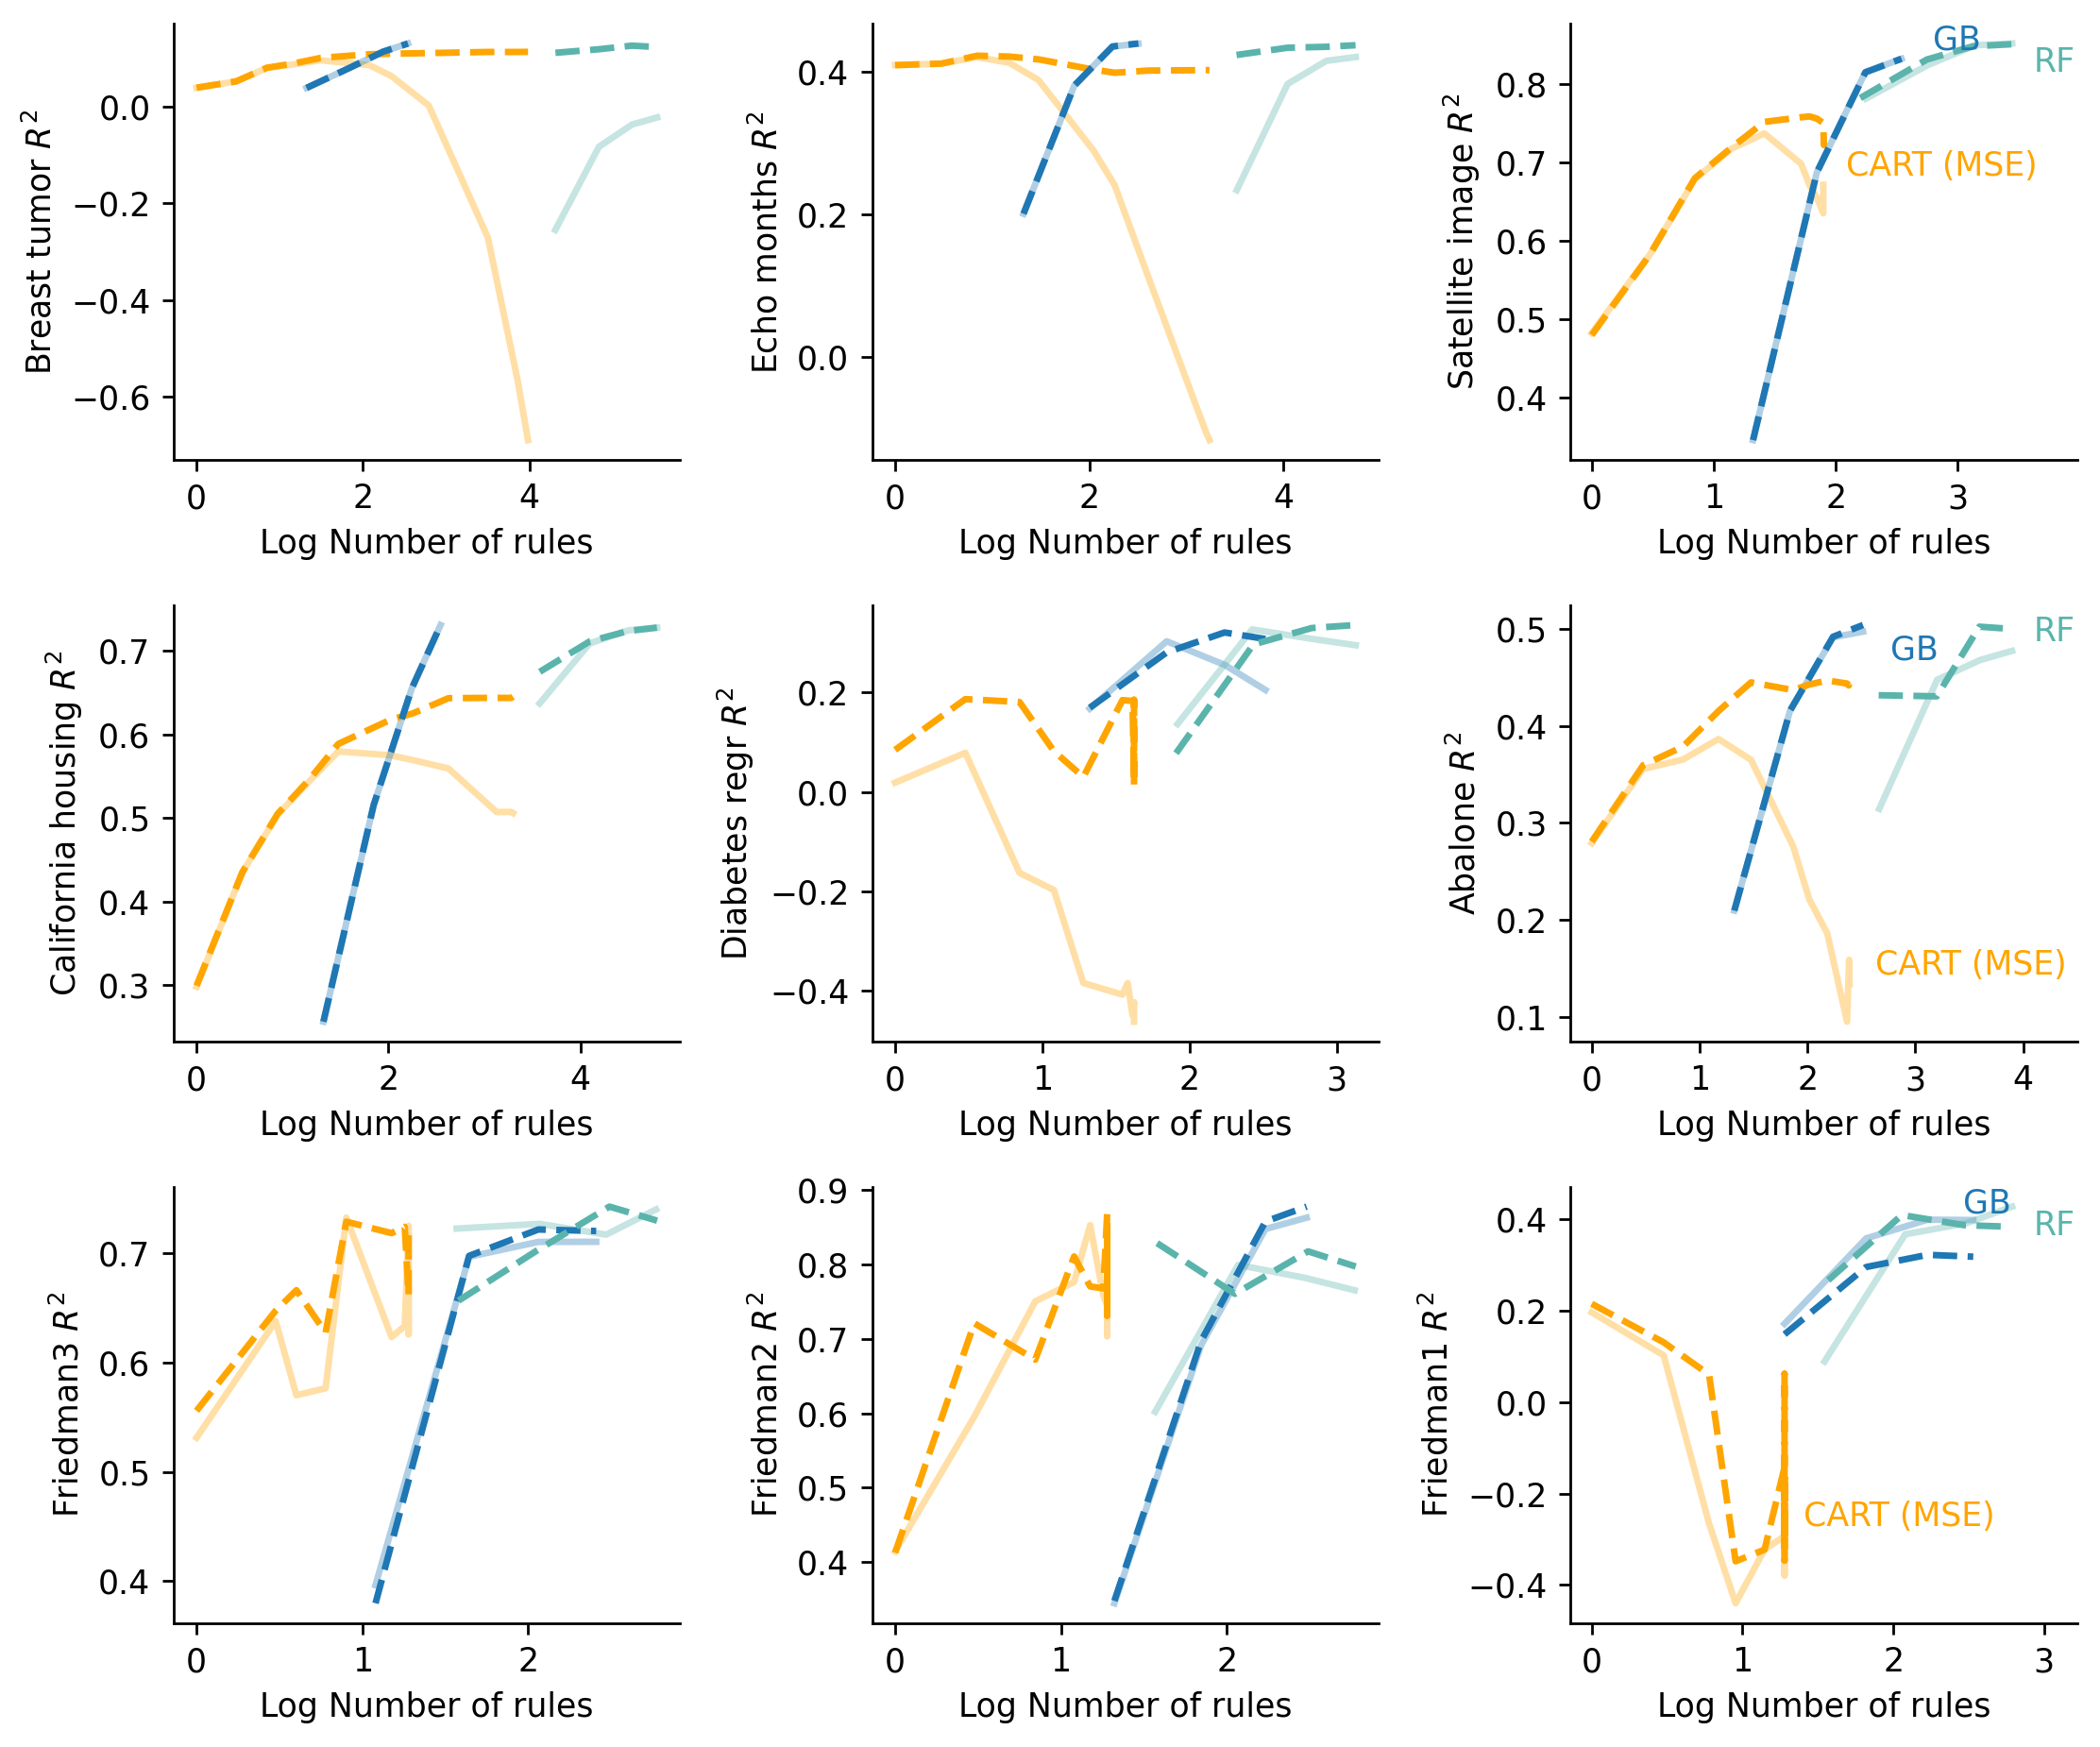

In [5]:
make_comparison_grid(metric='r2', num_dsets=len(DATASETS_REGRESSION), datasets=DATASETS_REGRESSION, # len(DATASETS_REGRESSION)
                models_to_include=['ShrunkCART', 'CART_(MSE)',
                                   'Shrunk_Random_Forest', 'Random_Forest',
                                   'Shrunk_Gradient_Boosting', 'Gradient_Boosting'],
                     save_name='shrinkage-regression-low', data_type='low_data')

100%|██████████| 11/11 [00:02<00:00,  3.79it/s]


/Users/chandan/rules/imodels-experiments/figs/shrinkage-classification.pdf


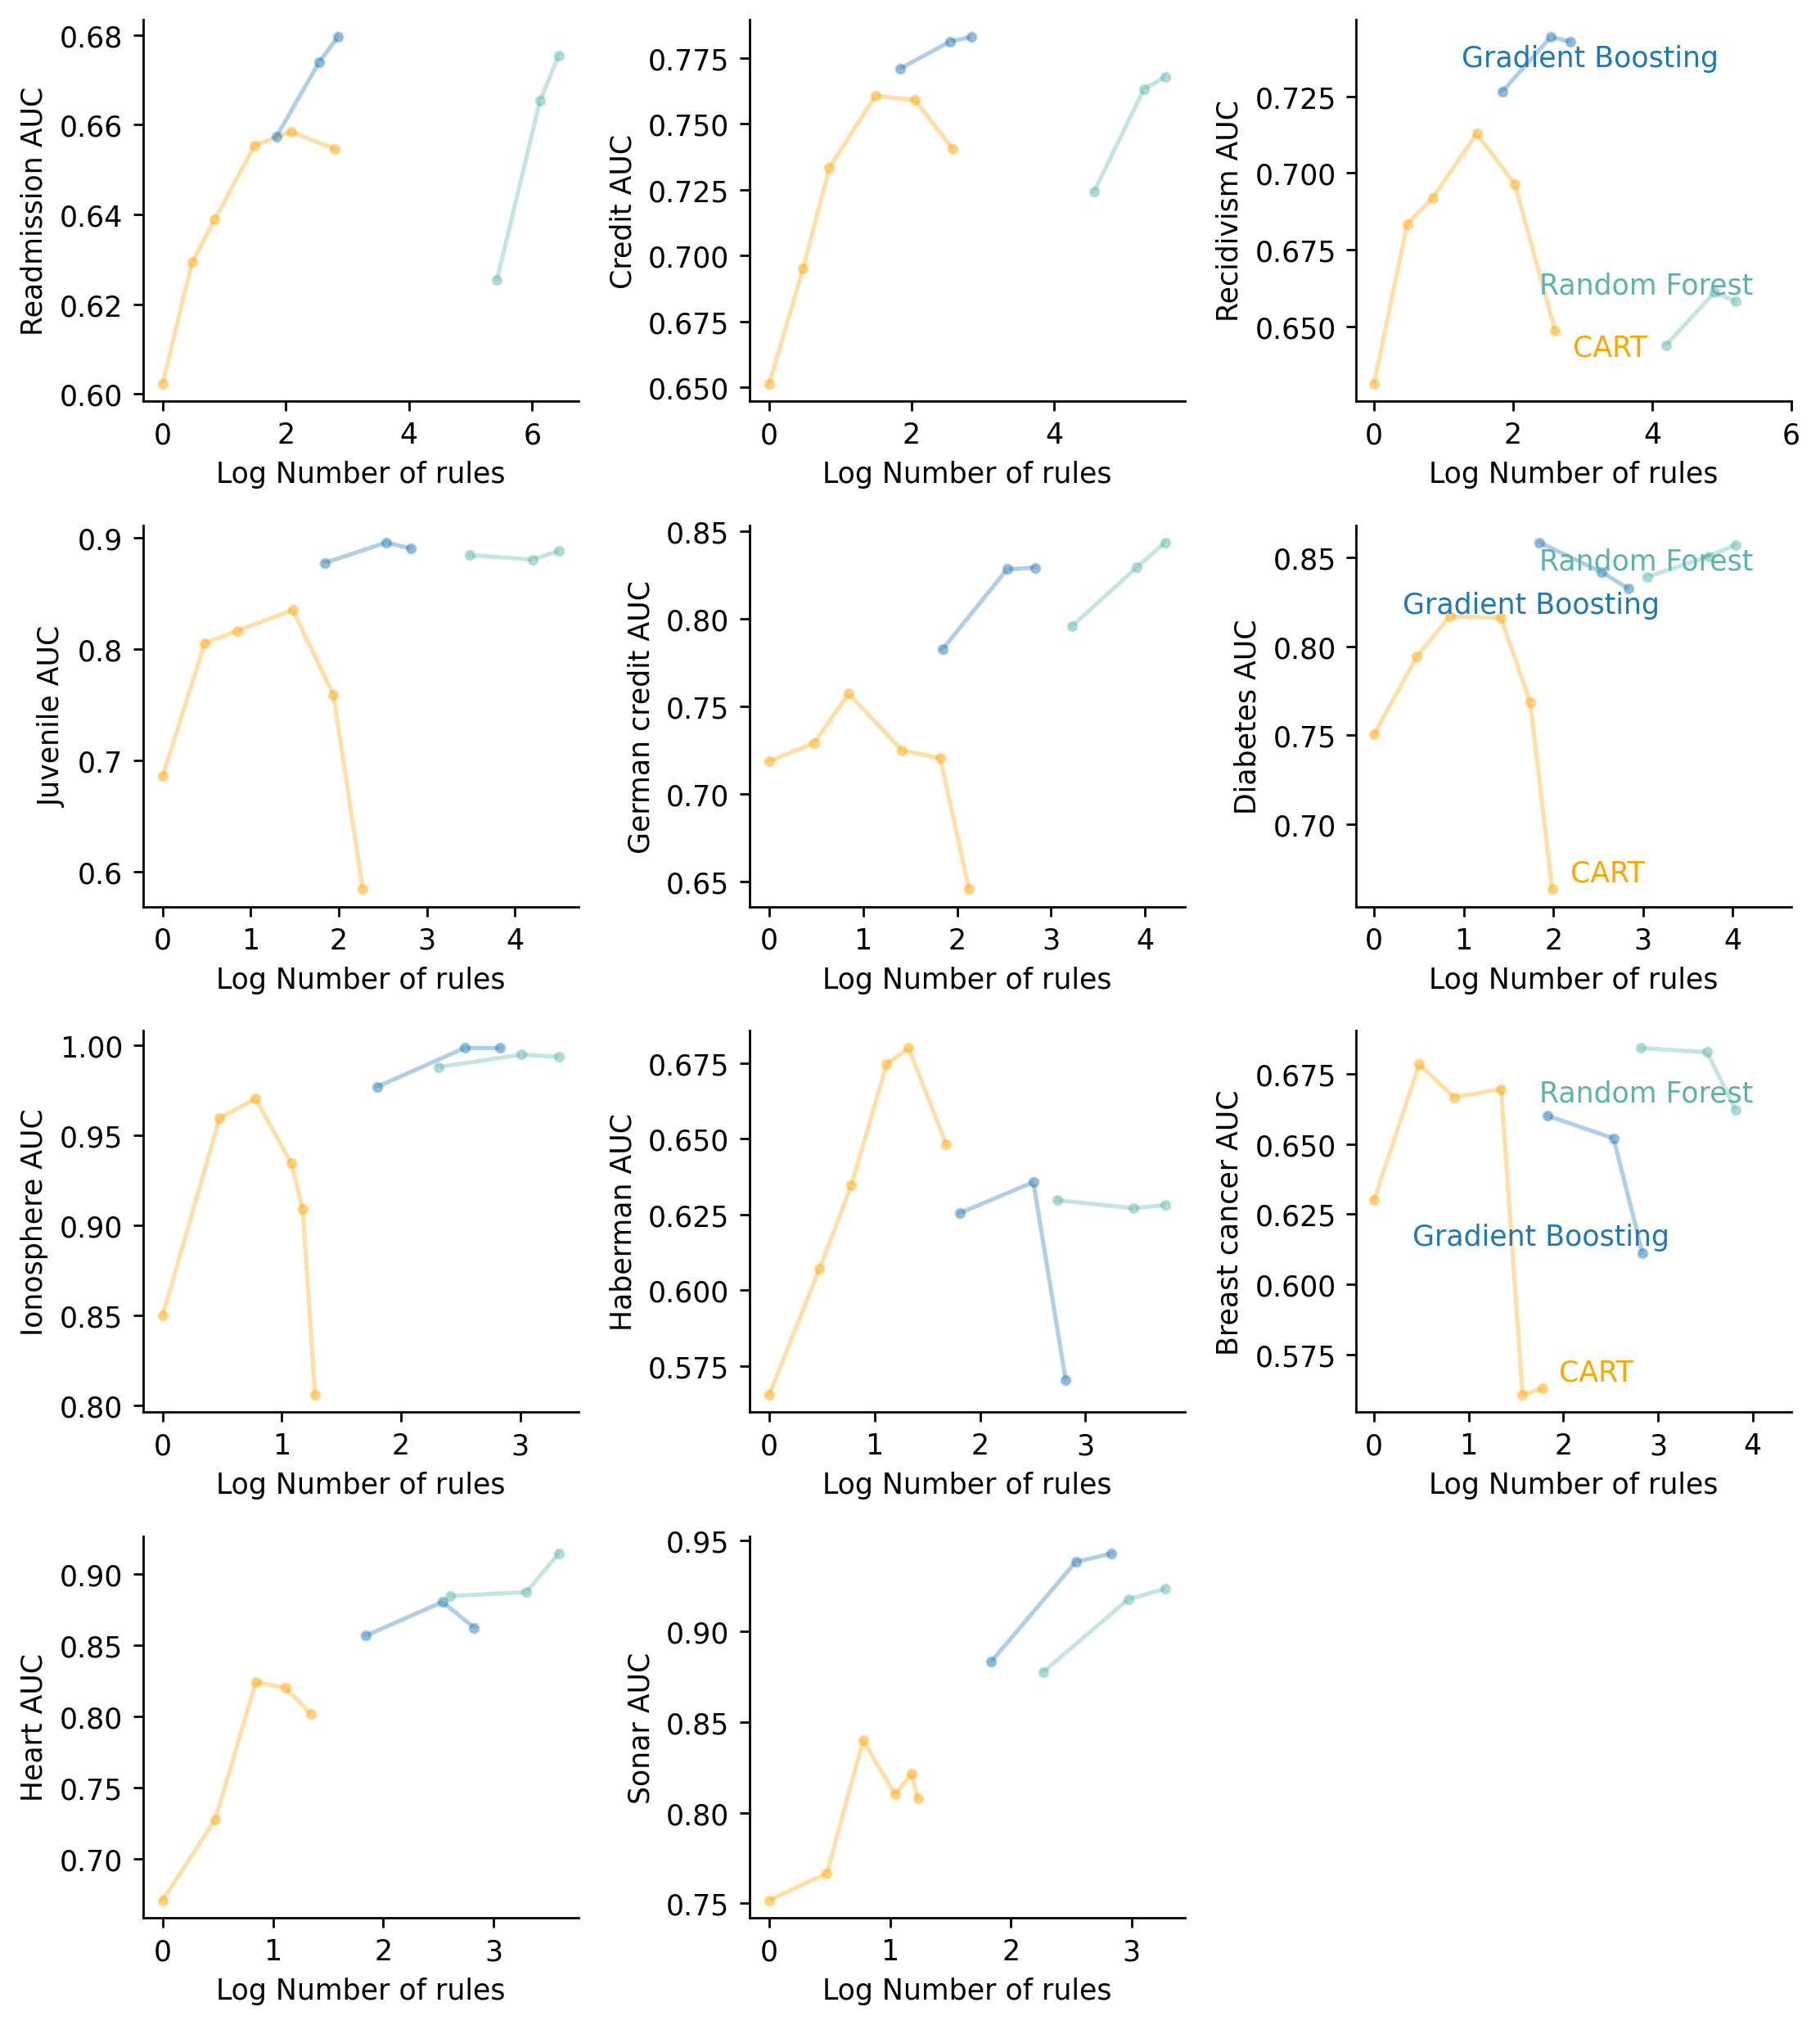

In [11]:
# make_comparison_grid(metric='rocauc', num_dsets=len(DATASETS_CLASSIFICATION), datasets=DATASETS_CLASSIFICATION,
#                 models_to_include=['CART', 'Random_Forest', 'Gradient_Boosting'],
#                 save_name='shrinkage-classification')
